In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

# File to Load
xlsx = "./states_and_coefs.xlsx"

# Read Data File and store into Pandas Data Frames
df1 = pd.read_excel(xlsx, "state_data")
df2 = pd.read_excel(xlsx, "qoi_coefs")
coef = pd.DataFrame(df2)

In [2]:
# Define variables 
states = df1['State']
population = df1['total_pop']
unemployment_rate = df1['unemployment_rate']/100
life_expec = df1['overall_life_expec']
divorce_rate = df1['Divorce_rate']
ea_high_school = df1['high_scool_percent']/100
ea_college = df1 ['college_percent']/100
gdp = df1['GDP']
pol_freedom = df1['Politcial_freedom']
latitude = df1['Latitude']
religion = df1['percent_religious']
earning_ratio = df1['earning_ratio_gender']
political_freedom = df1['human_freedom']

df_formatted = pd.DataFrame(
                {'States' : states,
                'Populations': population,
                'GDP per person': gdp,
                "High Scool Grad" : ea_high_school,
                "College Grad" : ea_college,
                'Life Expectancy': life_expec,
                'Political Freedom': pol_freedom,
                'Job Security':unemployment_rate,
                'Divorce Rate': divorce_rate,
                'Climate': latitude,
                'Political Stability' : political_freedom,
                'Gender equality' : earning_ratio,
                'Community Life' : religion})
df_formatted.head()

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security,Divorce Rate,Climate,Political Stability,Gender equality,Community Life
0,Alabama,4874747,37508,0.821,0.219,75.35,1.5,0.058,3.7,32.806671,8.39,0.760,0.77
1,Alaska,739795,63610,0.910,0.279,78.05,1.5,0.076,3.6,61.370716,8.39,0.768,0.45
2,Arizona,7016270,39583,0.856,0.259,80.00,1.5,0.058,3.5,33.729759,8.39,0.818,0.53
3,Arkansas,3004279,36714,0.829,0.195,76.05,1.5,0.056,3.7,34.969704,8.39,0.750,0.70
4,California,39536653,60359,0.807,0.301,80.45,1.5,0.059,5.5,36.116203,8.39,0.840,0.49


In [3]:
max(df_formatted["Divorce Rate"])

5.5

In [4]:
min(df_formatted["Divorce Rate"])

1.9

In [5]:
2.62

2.62

In [6]:
# Calculating "Family Life" : divorce rate index 
# Bins
divorce_bins = [1.8, 2.62, 3.34, 4.06, 4.78, 5.6]
group_names = ["1", "2", "3", "4", "5"]

# Rename dataframe
bin_pd = df_formatted

# Segment and sort data into buckets by Per Student Budget
bin_pd["Divorce Rate I"] = pd.cut(bin_pd["Divorce Rate"], divorce_bins, labels=group_names)

In [7]:
#df_new = bin_pd.drop(columns=['Divorce Rate'])
df_new1 = pd.DataFrame(bin_pd)
df_new1.head()

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security,Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I
0,Alabama,4874747,37508,0.821,0.219,75.35,1.5,0.058,3.7,32.806671,8.39,0.760,0.77,3
1,Alaska,739795,63610,0.910,0.279,78.05,1.5,0.076,3.6,61.370716,8.39,0.768,0.45,3
2,Arizona,7016270,39583,0.856,0.259,80.00,1.5,0.058,3.5,33.729759,8.39,0.818,0.53,3
3,Arkansas,3004279,36714,0.829,0.195,76.05,1.5,0.056,3.7,34.969704,8.39,0.750,0.70,3
4,California,39536653,60359,0.807,0.301,80.45,1.5,0.059,5.5,36.116203,8.39,0.840,0.49,5


In [8]:
coef

,weight,coef
0,Constant,2.79590
1,GDP,0.00003
2,Life_expectancy,0.04480
3,political_freedom,-0.10520
4,Job_security,-0.02170
5,Family_life,-0.18780
6,Climate,-1.35340
7,Political_stability,0.15190
8,Gender,0.74230
9,Community_life,0.38650


In [19]:
# Defining variable coefficients
constant = coef.iloc[0]["coef"]
gdp_coef = coef.iloc[1]["coef"]
life_coef = coef.iloc[2]["coef"]
polF_coef = coef.iloc[3]["coef"]
job_coef = coef.iloc[4]["coef"]
fam_coef = coef.iloc[5]["coef"]
clim_coef = coef.iloc[6]["coef"]
polS_coef = coef.iloc[7]["coef"]
genderE_coef = coef.iloc[8]["coef"]
community_coef = coef.iloc[9]["coef"]

QOL = constant + (gdp_coef * df_new1["GDP per person"]) + (life_coef * df_new1["Life Expectancy"]) +  (polF_coef * df_new1["Political Freedom"])+ (job_coef * df_new1["Job Security"]) + (fam_coef * df_new1["Divorce Rate I"].astype(int)) + (genderE_coef * df_new1["Gender equality"])+ (genderE_coef * df_new1["Gender equality"]) +(community_coef * df_new1["Community Life"]) + (clim_coef * stats.zscore(df_new1["Climate"]))
QOL
    

0      9.499684
1      3.858863
2      9.555720
3      8.978249
4      9.303311
5      8.924673
6      8.568865
7      9.153308
8     12.315380
9     10.926549
10     9.846088
11    12.835079
12     6.972688
13     8.820091
14     8.368505
15     8.371470
16     8.961401
17     8.454536
18    10.301916
19     7.189556
20     9.253750
21     8.748325
22     7.570402
23     7.504336
24     9.521751
25     8.657969
26     6.598364
27     8.383000
28     8.398564
29     7.816761
30     8.948849
31     9.506945
32     8.683160
33     9.434977
34     7.466013
35     8.341998
36     8.931835
37     7.433967
38     8.594041
39     8.197091
40     9.753372
41     7.548796
42     9.185623
43    10.867777
44     8.177379
45     7.599933
46     9.140676
47     6.974123
48     8.052352
49     7.743605
50     7.889727
dtype: float64

In [20]:
from scipy.stats import stats

In [21]:
np.mean(QOL)

8.66924297254902

In [22]:
# Rename dataframe, add QOL and sort by QOL
df_new1["QOL"]=QOL
final_df = df_new1
final_df.sort_values(by='QOL', ascending=False)

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security,Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I,QOL
11,Hawaii,1427538,52869,0.899,0.295,80.80,1.5,0.042,3.5,21.094318,8.39,0.833,0.47,3,12.835079
8,District of Columbia,693972,159607,0.874,0.501,77.10,1.5,0.066,2.5,38.897438,8.39,0.870,0.53,1,12.315380
9,Florida,20984400,39842,0.855,0.258,79.30,1.5,0.055,3.6,27.766279,8.39,0.850,0.54,3,10.926549
43,Texas,28304596,53737,0.807,0.259,78.35,1.5,0.051,2.2,31.054487,8.39,0.778,0.64,1,10.867777
18,Louisiana,4684333,44372,0.819,0.214,75.65,1.5,0.065,1.9,31.169546,8.39,0.667,0.71,1,10.301916
10,Georgia,10429379,45925,0.843,0.273,77.45,1.5,0.058,3.5,33.040619,8.39,0.824,0.66,3,9.846088
40,South Carolina,5024369,37637,0.841,0.245,77.10,1.5,0.058,2.6,33.856892,8.39,0.800,0.70,1,9.753372
2,Arizona,7016270,39583,0.856,0.259,80.00,1.5,0.058,3.5,33.729759,8.39,0.818,0.53,3,9.555720
24,Mississippi,2984100,32447,0.810,0.195,75.05,1.5,0.070,2.9,32.741646,8.39,0.750,0.77,2,9.521751
31,New Mexico,2088070,41619,0.833,0.250,78.30,1.5,0.066,3.2,34.840515,8.39,0.827,0.57,2,9.506945


In [133]:
# Rename dataframe, add QOL and sort by QOL
df_new1["QOL"]=QOL
final_df = df_new1
final_df.sort_values(by='QOL', ascending=False).head()


,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security,Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I,QOL
11,Hawaii,1427538,52869,0.899,0.295,80.80,1.5,0.042,3.5,21.094318,8.39,0.833,0.47,3,12.835079
8,District of Columbia,693972,159607,0.874,0.501,77.10,1.5,0.066,2.5,38.897438,8.39,0.870,0.53,1,12.315380
9,Florida,20984400,39842,0.855,0.258,79.30,1.5,0.055,3.6,27.766279,8.39,0.850,0.54,3,10.926549
43,Texas,28304596,53737,0.807,0.259,78.35,1.5,0.051,2.2,31.054487,8.39,0.778,0.64,1,10.867777
18,Louisiana,4684333,44372,0.819,0.214,75.65,1.5,0.065,1.9,31.169546,8.39,0.667,0.71,1,10.301916


In [134]:
# Rename dataframe, add QOL and sort by QOL
df_new1["QOL"]=QOL
final_df = df_new1
final_df.sort_values(by='QOL', ascending=False).tail()

,States,Populations,GDP per person,High Scool Grad,College Grad,Life Expectancy,Political Freedom,Job Security,Divorce Rate,Climate,Political Stability,Gender equality,Community Life,Divorce Rate I,QOL
19,Maine,1335907,39521,0.903,0.268,79.15,1.5,0.042,3.2,44.693947,8.39,0.837,0.34,2,7.189556
47,Washington,7405743,59333,0.898,0.311,79.85,1.5,0.049,3.4,47.400902,8.39,0.779,0.45,3,6.974123
12,Idaho,1716943,36441,0.883,0.244,79.70,1.5,0.041,3.9,44.240459,8.39,0.750,0.51,3,6.972688
26,Montana,1050493,39833,0.917,0.288,78.55,1.5,0.035,3.1,46.921925,8.39,0.752,0.48,2,6.598364
1,Alaska,739795,63610,0.910,0.279,78.05,1.5,0.076,3.6,61.370716,8.39,0.768,0.45,3,3.858863


In [165]:
top_df=final_df.sort_values(by='QOL', ascending=False).head()
print(top_df)

                  States  Populations  GDP per person  High Scool Grad  \
11                Hawaii      1427538           52869            0.899   
8   District of Columbia       693972          159607            0.874   
9                Florida     20984400           39842            0.855   
43                 Texas     28304596           53737            0.807   
18             Louisiana      4684333           44372            0.819   

    College Grad  Life Expectancy  Political Freedom  Job Security  \
11         0.295            80.80                1.5         0.042   
8          0.501            77.10                1.5         0.066   
9          0.258            79.30                1.5         0.055   
43         0.259            78.35                1.5         0.051   
18         0.214            75.65                1.5         0.065   

    Divorce Rate    Climate  Political Stability  Gender equality  \
11           3.5  21.094318                 8.39            0.833

In [167]:
bottom_df=final_df.sort_values(by='QOL', ascending=False).tail()
print(bottom_df)

        States  Populations  GDP per person  High Scool Grad  College Grad  \
19       Maine      1335907           39521            0.903         0.268   
47  Washington      7405743           59333            0.898         0.311   
12       Idaho      1716943           36441            0.883         0.244   
26     Montana      1050493           39833            0.917         0.288   
1       Alaska       739795           63610            0.910         0.279   

    Life Expectancy  Political Freedom  Job Security  Divorce Rate    Climate  \
19            79.15                1.5         0.042           3.2  44.693947   
47            79.85                1.5         0.049           3.4  47.400902   
12            79.70                1.5         0.041           3.9  44.240459   
26            78.55                1.5         0.035           3.1  46.921925   
1             78.05                1.5         0.076           3.6  61.370716   

    Political Stability  Gender equality  Co

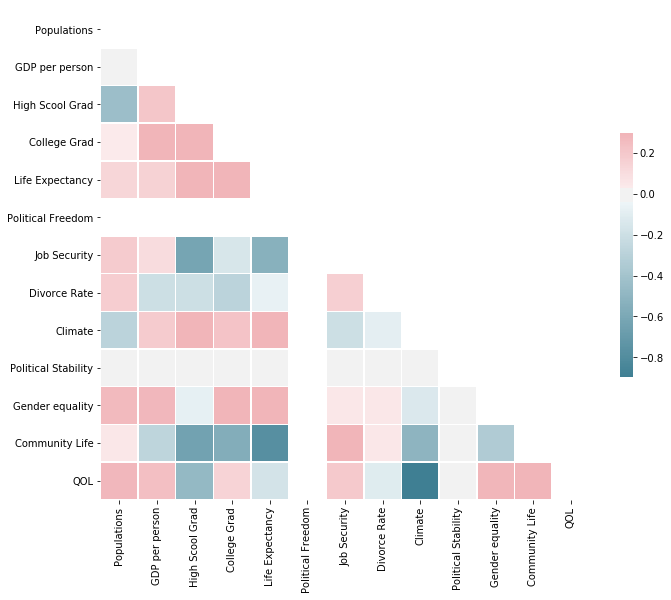

In [23]:
corr = final_df.corr()
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 15 columns):
States                 51 non-null object
Populations            51 non-null int64
GDP per person         51 non-null int64
High Scool Grad        51 non-null float64
College Grad           51 non-null float64
Life Expectancy        51 non-null float64
Political Freedom      51 non-null float64
Job Security           51 non-null float64
Divorce Rate           51 non-null float64
Climate                51 non-null float64
Political Stability    51 non-null float64
Gender equality        51 non-null float64
Community Life         51 non-null float64
Divorce Rate I         51 non-null category
QOL                    51 non-null float64
dtypes: category(1), float64(11), int64(2), object(1)
memory usage: 5.9+ KB


In [124]:
import statsmodels.api as sm # import statsmodels 

pvalues = []
variables = []

# OLS Regression analysis

x = final_df["QOL"] ## X usually means our input variables (or independent variables)
y = final_df["Gender equality"] ## Y usually means our output/dependent variable
X = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
print(model.summary())
#print(model.pvalues["Gender equality"])

#pvalues.append(model.pvalues["Gender equality"])
#variables.append("Gender equality")

                            OLS Regression Results                            
Dep. Variable:        Gender equality   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     4.409
Date:                Mon, 25 Mar 2019   Prob (F-statistic):             0.0409
Time:                        19:20:48   Log-Likelihood:                 84.942
No. Observations:                  51   AIC:                            -165.9
Df Residuals:                      49   BIC:                            -162.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7033      0.041     16.991      0.0

In [148]:
final_df.columns.values


array(['States', 'Populations', 'GDP per person', 'High Scool Grad',
       'College Grad', 'Life Expectancy', 'Political Freedom',
       'Job Security', 'Divorce Rate', 'Climate', 'Political Stability',
       'Gender equality', 'Community Life', 'Divorce Rate I', 'QOL'],
      dtype=object)

In [150]:
import statsmodels.api as sm # import statsmodels 

pvalues = []
variables = ['Populations', 'GDP per person','Life Expectancy', 'Political Freedom',
       'Job Security', 'Divorce Rate', 'Climate', 'Political Stability',
       'Gender equality', 'Community Life', 'QOL']

for category in variables:    
    # OLS Regression analysis
    x = final_df[category] ## X usually means our input variables (or independent variables)
    y = final_df["College Grad"] ## Y usually means our output/dependent variable
    X = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    # Print out the statistics
    #print(model.summary())
    #print(model.pvalues["QOL"])

    pvalues.append(model.pvalues[category])
    #variables.append("QOL")
print(variables)
print(pvalues)

['Populations', 'GDP per person', 'Life Expectancy', 'Political Freedom', 'Job Security', 'Divorce Rate', 'Climate', 'Political Stability', 'Gender equality', 'Community Life', 'QOL']
[0.80936643210584, 1.9216100144756819e-10, 2.093302898584332e-05, 9.594134394621639e-37, 0.28515222885035224, 0.041228638747529314, 0.11362078768433836, 9.594134394621776e-37, 0.0005353854634710484, 2.1425577927523504e-05, 0.29872300802754637]


In [155]:
pvalDF = pd.DataFrame()
pvalDF["Variables"] = variables
pvalDF["PValues"] = pvalues

Text(0.5, 0, 'PValues')

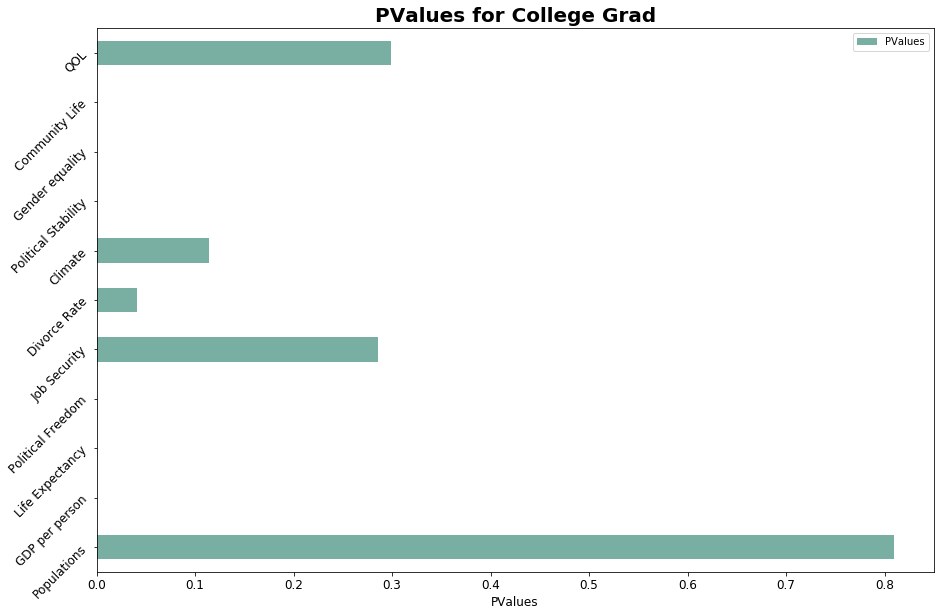

In [160]:

my_colors=[ '#79aea3']
ax=pvalDF.plot(kind="barh",figsize=(15,10),legend=True, fontsize=12, color=my_colors)
ax.set_title('PValues for College Grad',fontsize= 20, fontweight="bold")
ax.set_yticklabels(pvalDF.Variables, rotation=45)
ax.set_xlabel("PValues",fontsize=12)
#Save Figure
#plt.savefig("engagement1.png")

In [162]:
import statsmodels.api as sm # import statsmodels 

hs_pvalues = []
hs_variables = ['Populations', 'GDP per person','Life Expectancy', 'Political Freedom',
       'Job Security', 'Divorce Rate', 'Climate', 'Political Stability',
       'Gender equality', 'Community Life', 'QOL']

for hs_category in hs_variables:    
    # OLS Regression analysis
    x = final_df[hs_category] ## X usually means our input variables (or independent variables)
    y = final_df["High Scool Grad"] ## Y usually means our output/dependent variable
    X = sm.add_constant(x) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)

    # Print out the statistics
    #print(model.summary())
    #print(model.pvalues["QOL"])

    hs_pvalues.append(model.pvalues[hs_category])
    #variables.append("QOL")
print(hs_variables)
print(hs_pvalues)

['Populations', 'GDP per person', 'Life Expectancy', 'Political Freedom', 'Job Security', 'Divorce Rate', 'Climate', 'Political Stability', 'Gender equality', 'Community Life', 'QOL']
[0.0012618003119584885, 0.14094999977721412, 3.7564286954629558e-06, 5.766460453990273e-73, 1.1667518262561167e-06, 0.16547029200581637, 2.6131400709316264e-06, 5.766460453990273e-73, 0.5841800996012247, 3.2663606033598543e-07, 0.0004432484233701267]


Text(0.5, 0, 'PValues')

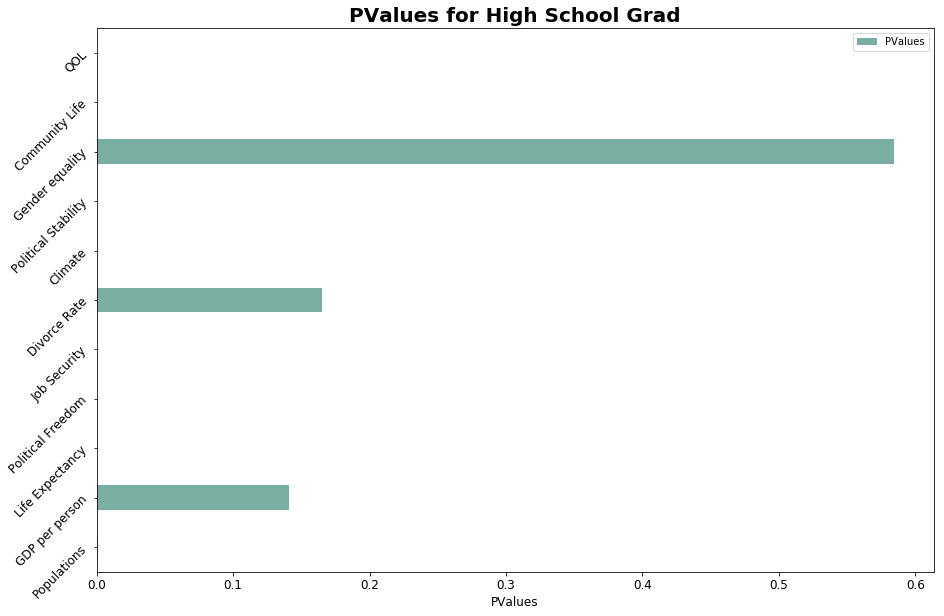

In [164]:
hs_pvalDF = pd.DataFrame()
hs_pvalDF["Variables"] = hs_variables
hs_pvalDF["PValues"] = hs_pvalues

my_colors=[ '#79aea3']
ax=hs_pvalDF.plot(kind="barh",figsize=(15,10),legend=True, fontsize=12, color=my_colors)
ax.set_title('PValues for High School Grad',fontsize= 20, fontweight="bold")
ax.set_yticklabels(hs_pvalDF.Variables, rotation=45)
ax.set_xlabel("PValues",fontsize=12)
#Save Figure
#plt.savefig("engagement1.png")

In [70]:
final_df["Gender equality"]

0     0.760
1     0.768
2     0.818
3     0.750
4     0.840
5     0.800
6     0.767
7     0.822
8     0.870
9     0.850
10    0.824
11    0.833
12    0.750
13    0.800
14    0.756
15    0.778
16    0.778
17    0.776
18    0.667
19    0.837
20    0.874
21    0.808
22    0.771
23    0.800
24    0.750
25    0.791
26    0.752
27    0.731
28    0.827
29    0.769
30    0.800
31    0.827
32    0.876
33    0.833
34    0.758
35    0.768
36    0.800
37    0.826
38    0.760
39    0.827
40    0.800
41    0.769
42    0.838
43    0.778
44    0.700
45    0.864
46    0.788
47    0.779
48    0.673
49    0.783
50    0.679
Name: Gender equality, dtype: float64

(array([ 4.,  6., 16., 12.,  6.,  5.,  1.,  0.,  0.,  1.]),
 array([0.175 , 0.2076, 0.2402, 0.2728, 0.3054, 0.338 , 0.3706, 0.4032,
        0.4358, 0.4684, 0.501 ]),
 <a list of 10 Patch objects>)

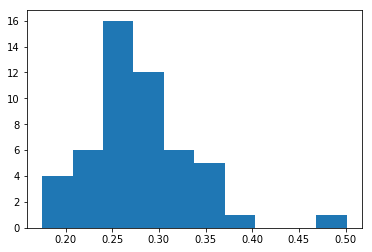

In [26]:
plt.hist(final_df["College Grad"])

(array([ 3.,  1.,  0.,  4., 11.,  8.,  7.,  9.,  4.,  4.]),
 array([0.667 , 0.6879, 0.7088, 0.7297, 0.7506, 0.7715, 0.7924, 0.8133,
        0.8342, 0.8551, 0.876 ]),
 <a list of 10 Patch objects>)

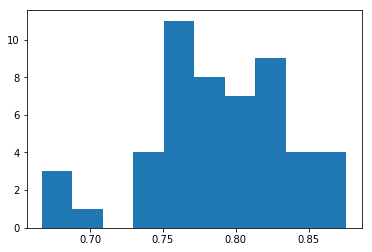

In [121]:
plt.hist(final_df["Gender equality"])

In [49]:
#stats.ttest_ind(final_df["High Scool Grad"], final_df["College Grad"], equal_var=False)

Ttest_indResult(statistic=63.96303220467766, pvalue=1.8938115164587337e-70)

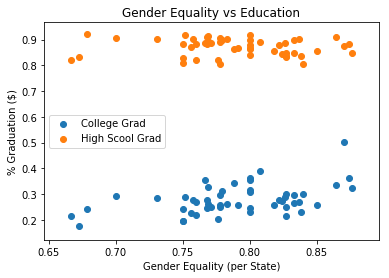

In [142]:
plt.scatter(final_df["Gender equality"], final_df["College Grad"])
plt.scatter(final_df["Gender equality"], final_df["High Scool Grad"])

#,final_df["High Scool Grad"]

plt.title('Gender Equality vs Education')
plt.xlabel('Gender Equality (per State)')
plt.ylabel('% Graduation ($)')
#plt.grid(True)


# Create a legend
plt.legend(loc="best")
plt.show()

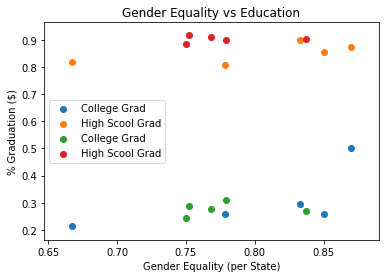

In [168]:
#with top_df
plt.scatter(top_df["Gender equality"], top_df["College Grad"])
plt.scatter(top_df["Gender equality"], top_df["High Scool Grad"])
plt.scatter(bottom_df["Gender equality"], bottom_df["College Grad"])
plt.scatter(bottom_df["Gender equality"], bottom_df["High Scool Grad"])


#,final_df["High Scool Grad"]

plt.title('Gender Equality vs Education')
plt.xlabel('Gender Equality (per State)')
plt.ylabel('% Graduation ($)')
#plt.grid(True)


# Create a legend
plt.legend(loc="best")
plt.show()

In [47]:
final_df["College Grad"].mean()

0.2793333333333333

In [48]:
final_df["Job Security"].mean()

0.05070588235294118

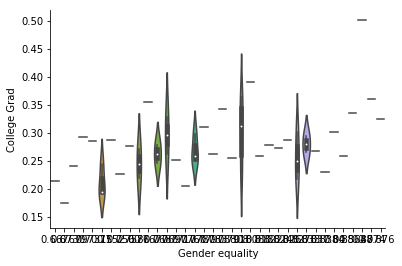

In [141]:
import seaborn as sns 
sns.violinplot(final_df['Gender equality'], final_df["College Grad"]) #Variable Plot
sns.despine()

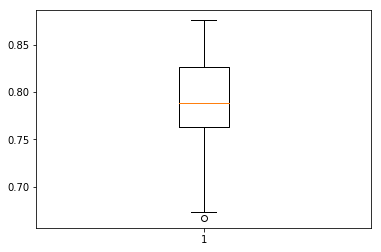

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
fig=plt.figure()
#ax = fig.add_subplot(1,1,1)
#bx = fig.add_subplot(1,1,1)
cx = fig.add_subplot(1,1,1)
#Variable
#ax.boxplot(final_df['College Grad'])
#bx.boxplot(final_df['High Scool Grad'])
cx.boxplot(final_df['Gender equality'])
plt.show()

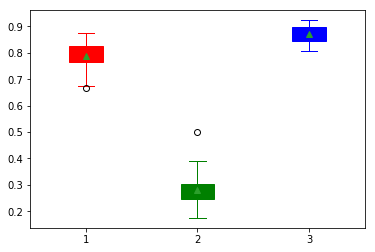

In [144]:
data = [final_df['Gender equality'],final_df['College Grad'],final_df['High Scool Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

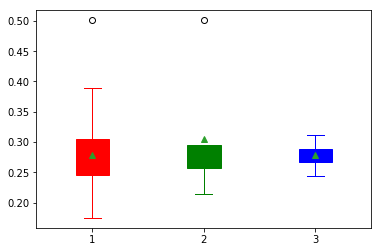

In [175]:
data = [final_df['College Grad'],top_df['College Grad'],bottom_df['College Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

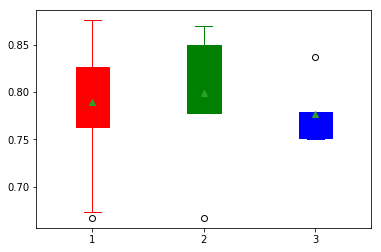

In [176]:
data = [final_df['Gender equality'],top_df['Gender equality'],bottom_df['Gender equality']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

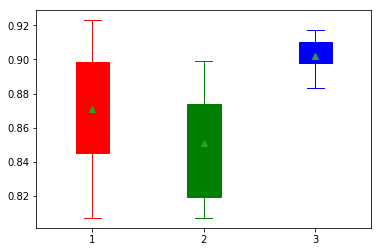

In [177]:
data = [final_df['High Scool Grad'],top_df['High Scool Grad'],bottom_df['High Scool Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

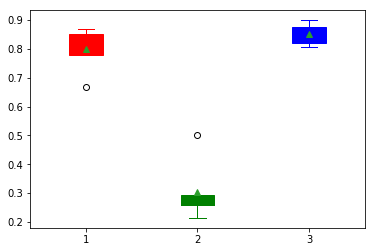

In [178]:
data = [top_df['Gender equality'],top_df['College Grad'],top_df['High Scool Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

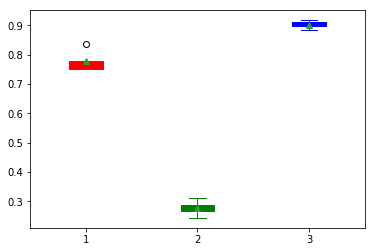

In [179]:
data = [bottom_df['Gender equality'],bottom_df['College Grad'],bottom_df['High Scool Grad']]
colors = ['red','green','blue']
fig, ax = plt.subplots()
box_dict = ax.boxplot(data, patch_artist=True,  showmeans=True)
for item in ['boxes', 'fliers', 'medians', 'means']:
    for sub_item,color in zip(box_dict[item], colors):
        plt.setp(sub_item, color=color)
# whiskers and caps have to be treated separately since there are two of each for each plot
for item in ['whiskers', 'caps']:
    for sub_items,color in zip(zip(box_dict[item][::2],box_dict[item][1::2]),colors):
        plt.setp(sub_items, color=color)

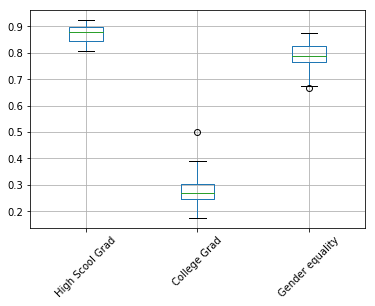

In [170]:
final_df.boxplot(column=['High Scool Grad','College Grad', 'Gender equality'],rot=45)


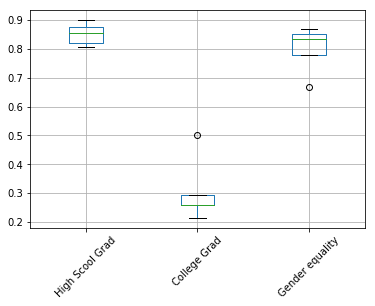

In [171]:
top_df.boxplot(column=['High Scool Grad','College Grad', 'Gender equality'],rot=45)

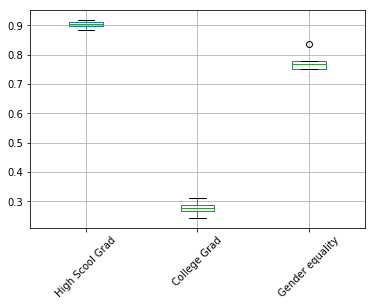

In [172]:
bottom_df.boxplot(column=['High Scool Grad','College Grad', 'Gender equality'],rot=45)